In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

from arch import arch_model



In [3]:
##import machine learning models

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [4]:
daatasources={
    source.replace(".zip",""):source 
    for source in os.listdir("/Users/eduardomartinezacha/Desktop/coding/python/final material/project") 
    if source.endswith(".zip")}
daatasources


{'de-shareprices-daily': 'de-shareprices-daily.zip'}

In [5]:
datasets={}

for key, values in daatasources.items():
    datasets[key]= pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}",sep=';')

In [6]:
import pandas as pd

datasets = {}

for key, values in daatasources.items():
    datasets[key] = pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}", sep=';')

# Combine all DataFrames into one
df = pd.concat(datasets.values(), ignore_index=True)

df['Price_Changes']= df['Open']- df['Close']
df['Price_Changes']

0        0.58
1        1.04
2       -0.43
3       -1.73
4       -1.92
         ... 
39091   -2.88
39092    2.82
39093    2.33
39094    0.00
39095   -0.27
Name: Price_Changes, Length: 39096, dtype: float64

In [7]:
df=pd.DataFrame(df)

In [8]:
vals=['VOW.DE','MBG.DE','BMW.DE','DRI.DE','DTE.DE']
df=df[df['Ticker'].isin(vals)]
df['Date']=pd.to_datetime(df['Date'])


In [9]:
automobile_vals=['VOW.DE','MBG.DE','BMW.DE']
auto=df[df['Ticker'].isin(automobile_vals)]
portfolio_auto= auto.groupby('Date').agg({'Close':'sum'})
portfolio_auto['log_returns']=np.log( portfolio_auto['Close']/portfolio_auto['Close'].shift(1))*100

telephone_vals=['DRI.DE','DTE.DE']
telephone= df[df['Ticker'].isin(telephone_vals)]
portfolio_tel= telephone.groupby('Date').agg({'Close':'sum'})
portfolio_tel['log_returns']=np.log( portfolio_tel['Close']/portfolio_tel['Close'].shift(1))*100



In [10]:
portfolio_auto= portfolio_auto[portfolio_auto['log_returns'].notnull()]
portfolio_tel= portfolio_tel[portfolio_tel['log_returns'].notnull()]


In [11]:
bmw=df[df['Ticker']=='BMW.DE']
dri=df[df['Ticker']=='DRI.DE']
dte=df[df['Ticker']=='DTE.DE']
mbg=df[df['Ticker']=='MBG.DE']
vow=df[df['Ticker']=='VOW.DE']


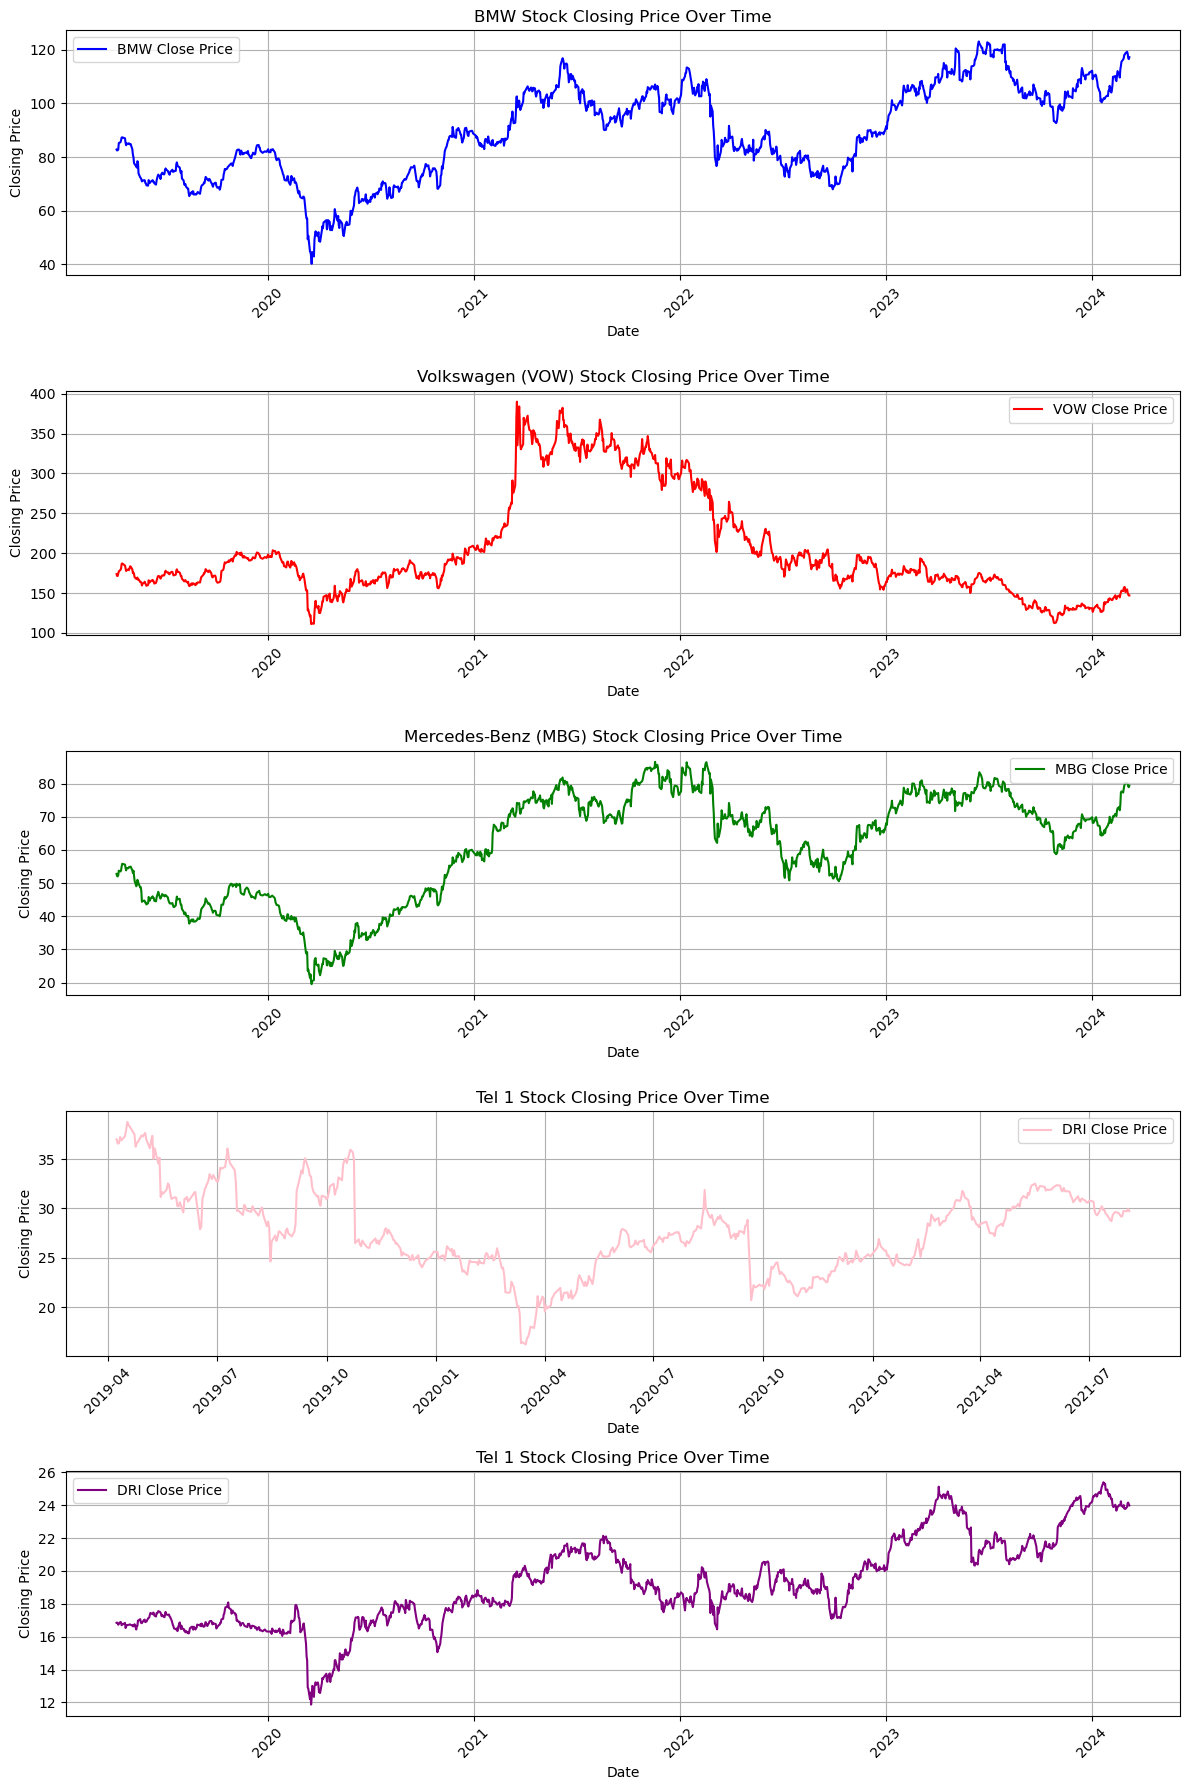

In [12]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(bmw['Date'], bmw['Close'], linestyle='-', label='BMW Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('BMW Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(vow['Date'], vow['Close'], linestyle='-', label='VOW Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Volkswagen (VOW) Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Mercedes-Benz (MBG) Stock Closing Price
axes[2].plot(mbg['Date'], mbg['Close'], linestyle='-', label='MBG Close Price', color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Mercedes-Benz (MBG) Stock Closing Price Over Time')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

axes[3].plot(dri['Date'], dri['Close'], linestyle='-', label='DRI Close Price', color='pink')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Closing Price')
axes[3].set_title('Tel 1 Stock Closing Price Over Time')
axes[3].legend()
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(True)

axes[4].plot(dte['Date'], dte['Close'], linestyle='-', label='DRI Close Price', color='purple')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Closing Price')
axes[4].set_title('Tel 1 Stock Closing Price Over Time')
axes[4].legend()
axes[4].tick_params(axis='x', rotation=45)
axes[4].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### best arch model for the bmw stocks

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

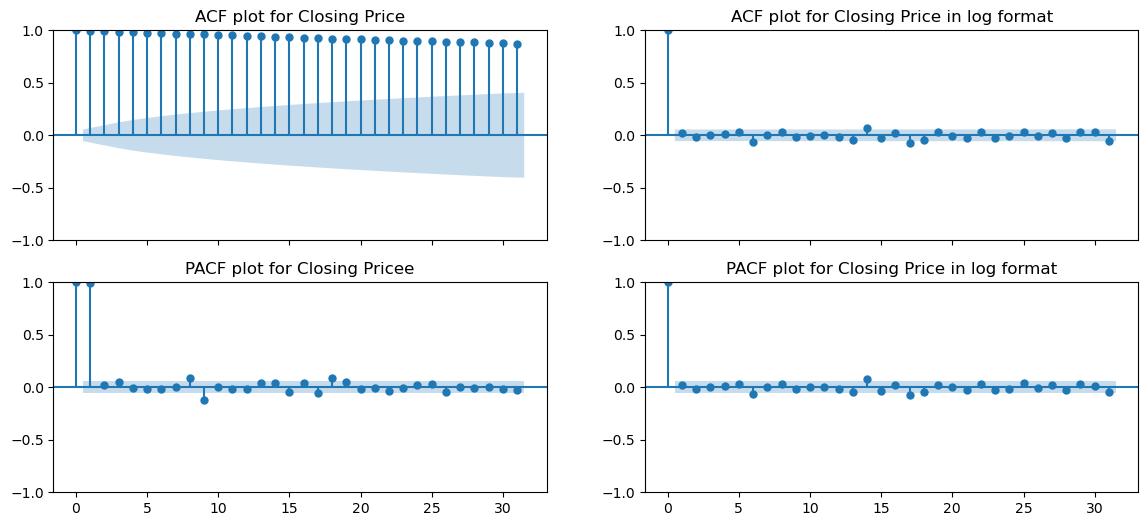

In [13]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( portfolio_auto['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(portfolio_auto['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( portfolio_auto['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(portfolio_auto['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [14]:
auto_training= portfolio_auto[portfolio_auto.index<='2024-02-20']
auto_testing=portfolio_auto[portfolio_auto.index>='2024-02-20']
auto_testing.index



DatetimeIndex(['2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
               '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29',
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [15]:
auto_training.index

DatetimeIndex(['2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-23', '2019-04-24',
               ...
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-19', '2024-02-20'],
              dtype='datetime64[ns]', name='Date', length=1239, freq=None)

### get the best combination for all type of timeseries prediction models before computing each model for auto


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Predicti

📈 Next predicted return: -0.01693149239006883
📉 Next predicted volatility (std dev): h.1    1.526543
Name: 2024-02-20 00:00:00, dtype: float64


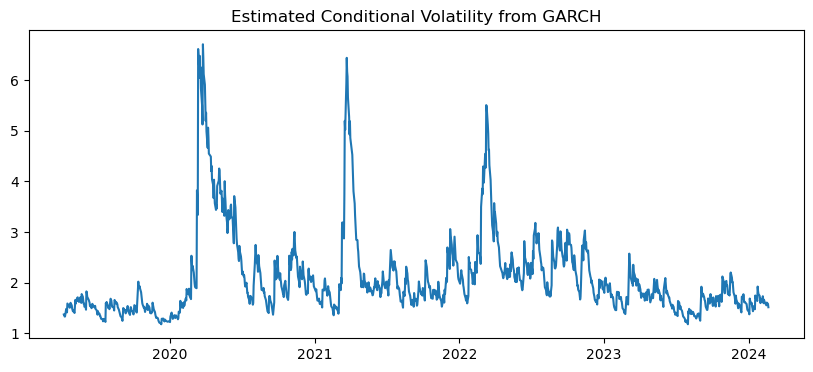

In [16]:
# Step 1: Prepare your log returns
y = auto_training['log_returns'].dropna()

# Step 2: Fit ARIMA model to mean
arima_model = ARIMA(y, order=(2, 0, 1))  # You can tune this later
arima_results = arima_model.fit()
residuals = arima_results.resid

# Step 3: Fit GARCH model to ARIMA residuals
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Step 4: Forecast next period
arima_forecast = arima_results.forecast(steps=1)
garch_forecast = garch_results.forecast(horizon=1)

next_return = arima_forecast.iloc[0]
next_volatility = (garch_forecast.variance.iloc[-1]) ** 0.5

print("📈 Next predicted return:", next_return)
print("📉 Next predicted volatility (std dev):", next_volatility)

# Optional: Plot volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_results.conditional_volatility)
plt.title("Estimated Conditional Volatility from GARCH")
plt.show()

In [17]:
# Step 1: Define your y
y = auto_training['log_returns'].dropna()

# Step 2: Fit ARIMA model
arima_model = ARIMA(y, order=(1, 0, 1))  # or whatever order you prefer
arima_results = arima_model.fit()
residuals = arima_results.resid

# Step 3: Fit GARCH on ARIMA residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Step 4: Forecasting multiple steps
forecast_horizon = len(pd.date_range(start="2024-02-20", end="2024-03-09", freq='B'))

# ARIMA forecast for mean (returns)
arima_forecast = arima_results.forecast(steps=forecast_horizon)

# GARCH forecast for variance
garch_forecast = garch_results.forecast(horizon=forecast_horizon)

# Extract values
mean_returns = arima_forecast.values
volatility_forecast = garch_forecast.variance.values[-1]**0.5  # Last row, all steps

# Build forecast DataFrame
forecast_df = pd.DataFrame({
    'date': pd.date_range(start="2024-02-20", end="2024-03-09", freq='B'),
    'expected_return': mean_returns,
    'volatility': volatility_forecast
})
forecast_df.set_index('date', inplace=True)
forecast_df


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Predicti

,expected_return,volatility
date,,
2024-02-20,-0.015455,1.529236
2024-02-21,0.017808,1.554577
2024-02-22,-0.005037,1.578869
2024-02-23,0.010653,1.602175
2024-02-26,-0.000123,1.624555
2024-02-27,0.007278,1.646062
2024-02-28,0.002195,1.666742
2024-02-29,0.005686,1.686642
2024-03-01,0.003288,1.705802


In [18]:
forecast_horizon

14

In [19]:
forecast_df

,expected_return,volatility
date,,
2024-02-20,-0.015455,1.529236
2024-02-21,0.017808,1.554577
2024-02-22,-0.005037,1.578869
2024-02-23,0.010653,1.602175
2024-02-26,-0.000123,1.624555
2024-02-27,0.007278,1.646062
2024-02-28,0.002195,1.666742
2024-02-29,0.005686,1.686642
2024-03-01,0.003288,1.705802


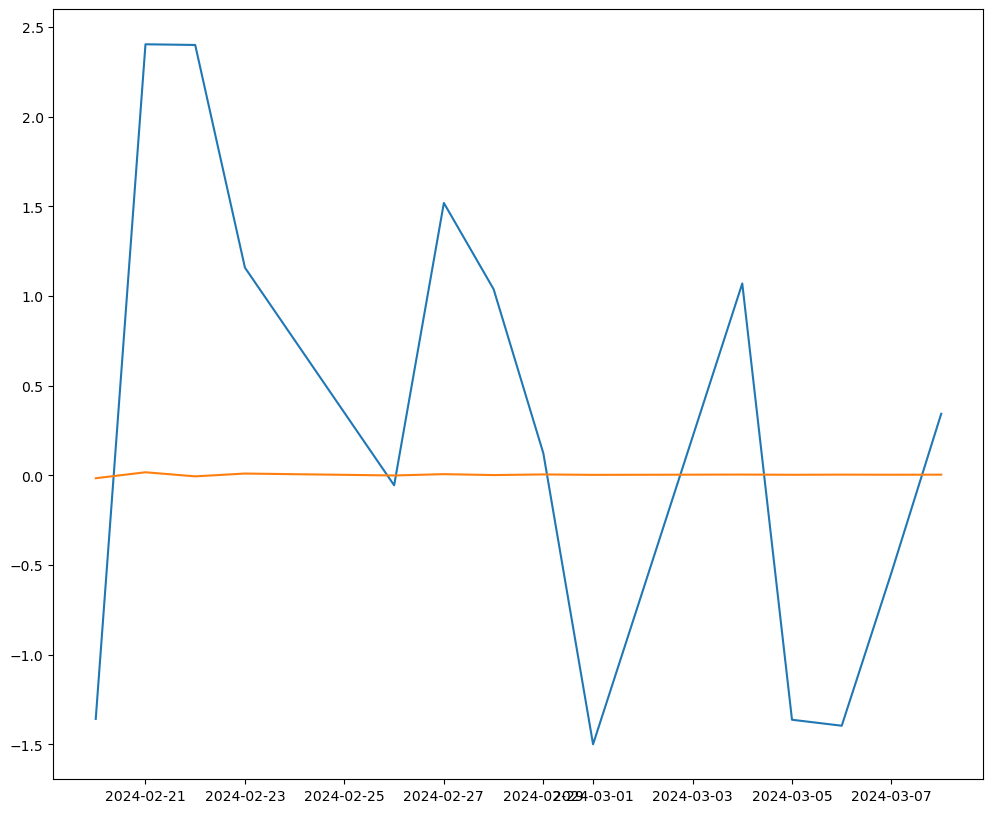

In [20]:
plt.figure(figsize=(12,10))
plt.plot(auto_testing.index,auto_testing['log_returns'],linestyle='-')
plt.plot(forecast_df.index,forecast_df['expected_return'])

In [21]:
auto_testing.index

DatetimeIndex(['2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
               '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29',
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [22]:
forecast_df.index==auto_testing.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [23]:
len(forecast_df.index)

14

In [24]:

auto_training.index = pd.to_datetime(auto_training.index)


In [36]:
auto_training

,Close,log_returns
Date,,
2019-04-09,306.09,-1.049716
2019-04-10,306.04,-0.016336
2019-04-11,309.17,1.017548
2019-04-12,316.10,2.216733
2019-04-15,318.19,0.659007
...,...,...
2024-02-14,320.99,-0.998148
2024-02-15,326.93,1.833611
2024-02-16,330.77,1.167719


### xgboost

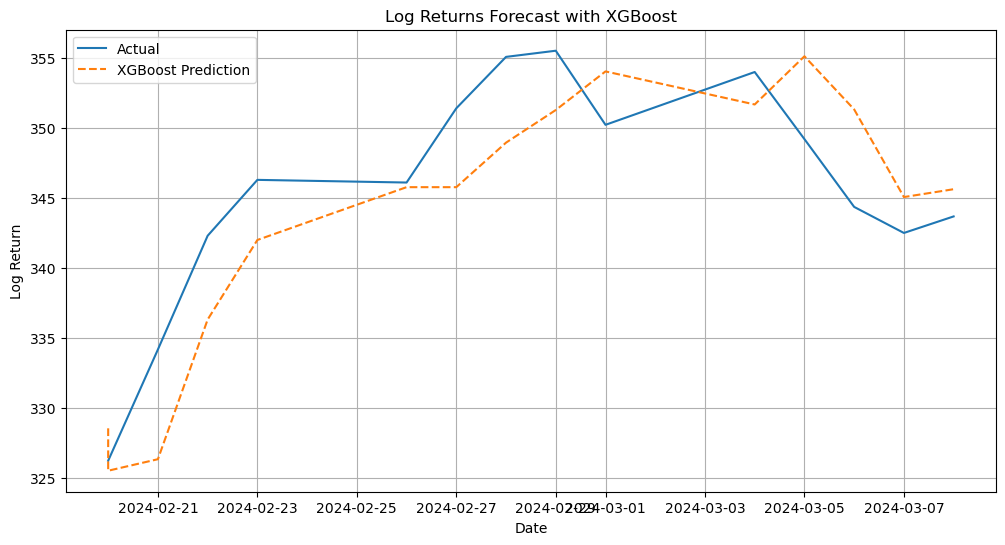

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Ensure datetime indexes
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Combine both to create lag features across the boundary
combined = pd.concat([auto_training, auto_testing])

# Step 2: Create lag features (e.g., 5 lags)
for i in range(1, 6):
    combined[f'lag_{i}'] = combined['Close'].shift(i)

combined.dropna(inplace=True)

# Step 3: Split again using the original auto_training and auto_testing indexes
X = combined[[f'lag_{i}' for i in range(1, 6)]]
y = combined['Close']

# Match indices
X_train = X.loc[auto_training.index.intersection(X.index)]
y_train = y.loc[auto_training.index.intersection(y.index)]

X_test = X.loc[auto_testing.index.intersection(X.index)]
y_test = y.loc[auto_testing.index.intersection(y.index)]

# Step 4: Train the XGBoost model
model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Predict
preds = model.predict(X_test)

# Step 6: Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(y_test.index, preds, label='XGBoost Prediction', linestyle='--')
plt.title('Log Returns Forecast with XGBoost')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()



In [ ]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index
auto_training.index = pd.to_datetime(auto_training.index)
y_train = auto_training['log_returns']

# Define parameter ranges
p = d = q = range(0, 3)         # Non-seasonal
P = D = Q = range(0, 2)         # Seasonal
s = [252]                         # Weekly seasonality for daily data

# Create parameter grid
import itertools
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

# To store results
results = []
best_aic = np.inf
best_params = None

# Silence convergence warnings
warnings.filterwarnings("ignore")

# Grid search loop
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(
                y_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit(disp=False)
            results.append((order, seasonal_order, res.aic))

            if res.aic < best_aic:
                best_aic = res.aic
                best_params = (order, seasonal_order)

        except:
            continue

# Sort and print top 5
sorted_results = sorted(results, key=lambda x: x[2])
print("🔍 Top 5 parameter combinations (by AIC):")
for i in range(min(5, len(sorted_results))):
    print(f"{i+1}. Order: {sorted_results[i][0]}, Seasonal: {sorted_results[i][1]}, AIC: {sorted_results[i][2]:.2f}")

print("\n✅ Best model found:")
print(f"Order: {best_params[0]}")
print(f"Seasonal Order: {best_params[1]}")
print(f"AIC: {best_aic:.2f}")


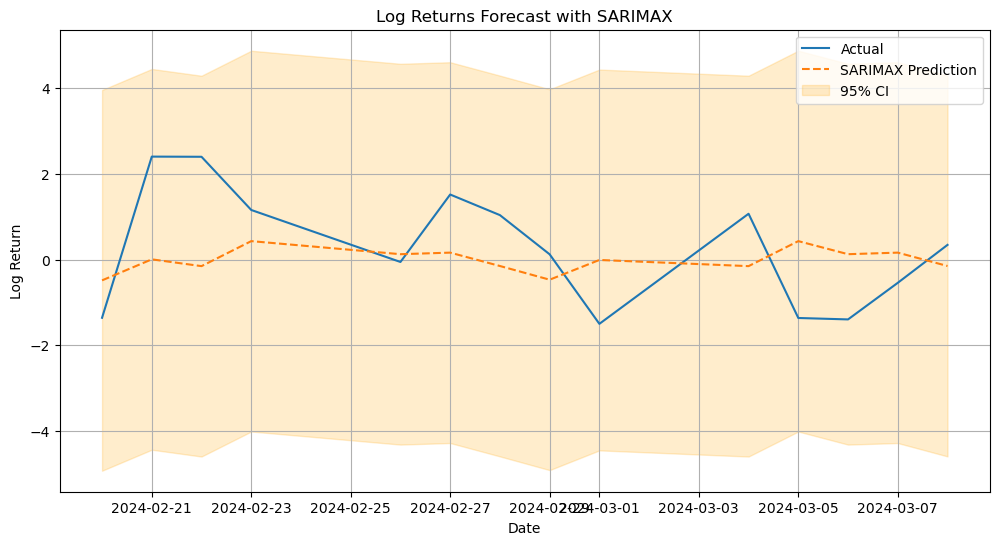

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Define y_train and y_test
y_train = auto_training['log_returns']
y_test = auto_testing['log_returns']

# Step 2: Fit SARIMAX model
# You can tune (p, d, q) and (P, D, Q, s) as needed
model = SARIMAX(
    y_train,
    order=(0, 0, 2),             # ARIMA part: (p, d, q)
    seasonal_order=(0, 1, 1, 7), # Weekly seasonality for daily data
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Step 3: Forecast the same number of steps as auto_testing
n_test = len(auto_testing)
forecast = results.get_forecast(steps=n_test)

# Step 4: Extract predicted values + confidence intervals
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Match forecast index to auto_testing
predicted_mean.index = auto_testing.index
conf_int.index = auto_testing.index

# Step 5: Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(predicted_mean.index, predicted_mean, label='SARIMAX Prediction', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2, label='95% CI')
plt.title('Log Returns Forecast with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()
